# Installing fastbook

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 19.0MB/s 
     |████████████████████████████████| 194kB 51.2MB/s 
     |████████████████████████████████| 51kB 8.6MB/s 
     |████████████████████████████████| 1.2MB 56.0MB/s 
     |████████████████████████████████| 61kB 9.4MB/s 
Mounted at /content/gdrive


#Introductory Notes


Deep learning has been used to solve many problems such as
* Natural Language Processing (NLP). This is particularly used in speech recognition (converting speech to text), summerizing documents (curious how this is done), classifying documents, etc.
* Computer Vision. This is good for detecting recognizing text in images, face recognition, autonomous driving etc.
* Medicine. Finding anomolies in radiology images. 
* Biology. Protien work that has traditionally been difficult to do (AlphaFold)
* Image generation. Colorizing black and white photos, removing noise. I recently saw a generator of human faces that were not actual people. 
* Recommendation systems. Product recommendations based on what you like
* Playing games. In the realm of reinforcement learning I suppose with no human intervention.
* Robotics. Think Boston Dynamics
* Much more

Essentially this idea has been floating around since the 1940's. Essentially trying to mimic a real neutron. However back in the day, due to limited computing resources and data, it wasn't possible. This changed as we advanced in computing.

The two authors gave some information about themselves an how to learn deep learning. Reviewed some of the tools for the fastai book such as PyTorch and Jupyter. I will be using Google Collab since they provide a GPU for free to run the models.

# Image Classification

In [ ]:

# Imports computer vision models
from fastai.vision.all import *
# This is an Oxford dataset of cats and dogs, 37 different breeds
print("Downloading images")
path = untar_data(URLs.PETS)/'images'

# Method for identifying if image is a dog
def is_dog(x): return x[0].islower()

print("Loading images")
# Dataloader for images, similar to how pandas/arrays are used to load in csv files/data
# Used to describe the dataset to fastai
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_dog, item_tfms=Resize(224))
# item_tfms is essentially applying a transformer to the data while training. In this case resizing the images.
# valid_pct tells the model to hold out 20% of the data and not use it for training
# seed is good to ensure that the same validation dataset is chosen. This will ensure that if changes are made to the model, the result is due to these changes and not in the data 
# passed in

# Creates a Convolutional Neural Network
# resenet is one of the many architectures or model of a CNN to use
# error_rate will tell you how many it classifies incorrectly
print("Creating CNN Learner")
learn = cnn_learner(dls, resnet34, metrics=error_rate)

# Fitting the model
# Fine tune used since this is a pre trained model
print("Fine tuning")
learn.fine_tune(1)

Loading images
Creating CNN Learner
Fine tuning


epoch,train_loss,valid_loss,error_rate,time
0,0.132949,0.025500,0.006089,00:50


epoch,train_loss,valid_loss,error_rate,time
0,0.052985,0.010604,0.004736,00:57


Error rate is super low, telling us that it is a good model at telling you if it is a picture of a cat or not.

In [ ]:
# Testing with my own image:
import ipywidgets as widgets
#hide_output
uploader = widgets.FileUpload()
uploader

#hide 
# For the book, we can't actually click an upload button, so we fake it (Only added if needed later for submission)
# uploader = SimpleNamespace(data = ['images/chapter1_cat_example.jpg'])

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(uploader.data[0])
is_dog,_,probs = learn.predict(img)
print(f"Is this a dog?: {is_dog}.")
print(f"Probability it's a dog: {probs[1].item():.6f}")

Is this a dog?: True.
Probability it's a dog: 0.999947


# What is Machine Learning

Instead of telling the program step by step on how to do a certain task, we allow the program to learn itself. 

Now you pass weights and inputs together. Weights will help the program figure out how important a certain feature is in order to solve the problem at hand.

The actual performance is measured by seeing how accurate the program is at solving the problem. You can also set two models against each other to figure this out as well.

Weights automatically adjusted. No need for any intervention.

What is NN?

Sometimes creating the model isn't straightforward. For example in image recognition.

NN is essentially a function that can solve any problems just by varying the weights. 

In addition to creating a model, it can test with varying weights to find the best model and weights to solve a problem.

Stochastic Gradient Descent used to find best weights 

Other notes: 

Each layer is a building block for the program to understand the task at hand. The higher the layer, the bigger the picture it can see.

Wow so you can convert anything into an image and feed it to NN to figure out the best model to solve the problem. The sound -> image was very cool.

Keeping this for later:
asciidoc


|Label | The data that we're trying to predict, such as "dog" or "cat"

|Architecture | The _template_ of the model that we're trying to fit; the actual mathematical function that we're passing the input data and parameters to

|Model | The combination of the architecture with a particular set of parameters

|Parameters | The values in the model that change what task it can do, and are updated through model training

|Fit | Update the parameters of the model such that the predictions of the model using the input data match the target labels

|Train | A synonym for _fit_

|Pretrained model | A model that has already been trained, generally using a 
large dataset, and will be fine-tuned

|Fine-tune | Update a pretrained model for a different task

|Epoch | One complete pass through the input data

|Loss | A measure of how good the model is, chosen to drive training via SGD

|Metric | A measurement of how good the model is, using the validation set, chosen for human consumption

|Validation set | A set of data held out from training, used only for measuring how good the model is

|Training set | The data used for fitting the model; does not include any data from the validation set

|Overfitting | Training a model in such a way that it _remembers_ specific features of the input data, rather than generalizing well to data not seen during training

|CNN | Convolutional neural network; a type of neural network that works particularly well for computer vision tasks


# Segmentation

Here we will try to do segmentation detect particular items in an image. Particular objects will be color coded the same.

In [ ]:
# Similar to before, the dataset
path = untar_data(URLs.CAMVID_TINY)

#This time picking the segmentation to describe the dataset
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

# This must be the type of model we need, resnet34 is the architecture we will use (34 layers)
learn = unet_learner(dls, resnet34)

#Training (Fitting) the data on our dataset on the pre-trained model
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.068245,2.349619,00:01


epoch,train_loss,valid_loss,time
0,1.895169,1.611429,00:01
1,1.650338,1.262958,00:01
2,1.538637,1.138407,00:01
3,1.383793,0.912954,00:01
4,1.233523,0.851478,00:01
5,1.108955,0.751607,00:01
6,1.009763,0.706963,00:01
7,0.932459,0.703386,00:01


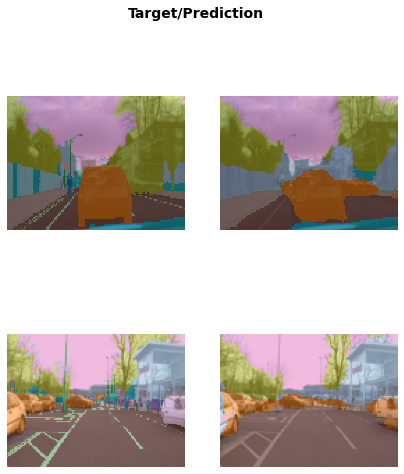

In [ ]:
# This is actually really cool...
learn.show_results(max_n=6, figsize=(7,8))

In [ ]:
# Testing with my own image:
import ipywidgets as widgets
#hide_output
uploader = widgets.FileUpload()
uploader


FileUpload(value={}, description='Upload')

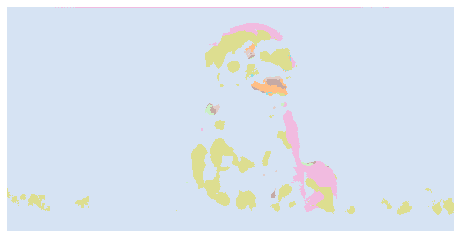

In [ ]:
#hide 
# For the book, we can't actually click an upload button, so we fake it (Only added if needed later for submission)
# uploader = SimpleNamespace(data = ['images/chapter1_cat_example.jpg'])
# This is on the puppy picture i picked earlier
img = PILImage.create(uploader.data[0])
prediction = learn.predict(img)
prediction[0].show(figsize=(8,8))

# Sentiment Analysis

With Deep Learning we can now generate text, label words, analyze text, translate text. 

The following is for seeing the sentiment of a movie review (Apparently this is better than what we had before)

In [ ]:
# from fastai.text.all import *

# dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
# learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
# learn.fine_tune(4, 1e-2)

# In case the above fails, run this:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test', bs=32)
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.476043,0.419202,0.812000,04:29


epoch,train_loss,valid_loss,accuracy,time
0,0.303962,0.271438,0.889240,08:44
1,0.253532,0.247790,0.896120,08:44
2,0.189699,0.184464,0.928480,08:43
3,0.135308,0.191668,0.929800,08:44


In [ ]:
learn.predict("The plot was exposed very early in the movie. But overall it was alright.")


('pos', tensor(1), tensor([0.0025, 0.9975]))

In [ ]:
# If you want to see documentation of a method
doc(learn.predict)

# Tabular Learning

This will be predicting if the person is a high earner based on background

In [ ]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

This uses a hybrid of models (naive bayes and decision tree)

This is so cool. Essentially in ML we could have just used this to create a accurate models for some of the basic questions. 

Question would be, why use ML when we can just DL?

In [ ]:
import pandas as pd 
# initialize list of lists 
data = [['private', 'Assoc-acdm', 'Married-civ-spouse','#na#','wife', 'white', 49.0, 101320.001685, 12.0]] 
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'age','fnlwgt','education-num']) 
learn.predict(df.iloc[0]) # returns row, class, probability

(   workclass  education  marital-status  occupation  relationship  race  \
 0        0.0        8.0             3.0         0.0           0.0   0.0   
 
    education-num_na       age    fnlwgt  education-num  salary  
 0               1.0  0.765284 -0.834294       0.750814     0.0  ,
 tensor(0),
 tensor([0.5164, 0.4836]))

# Ranking

In this example we will recommend other products/movies a person might like.

In [ ]:

from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.517481,1.350460,00:00


epoch,train_loss,valid_loss,time
0,1.373524,1.293540,00:00
1,1.265881,1.119738,00:00
2,1.012118,0.842350,00:00
3,0.795233,0.728702,00:00
4,0.685389,0.706379,00:00
5,0.643124,0.702567,00:00
6,0.618091,0.699107,00:00
7,0.614206,0.698171,00:00
8,0.612519,0.697549,00:00
9,0.603898,0.697471,00:00


In [ ]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,39.0,49.0,3.5,4.031785
1,83.0,100.0,4.0,4.076054
2,19.0,94.0,4.5,3.656266
3,53.0,69.0,4.5,4.564094
4,3.0,12.0,3.0,3.000511
5,86.0,50.0,3.5,3.716930
6,34.0,23.0,3.0,3.332168
7,62.0,6.0,2.5,4.107617
8,48.0,73.0,4.0,4.111451
